In [3]:
import pandas as pd

In [86]:
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\DATASET\\HR_comma_sep.csv')
df[000:6100]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
6095,0.92,0.54,5,203,3,0,0,0,IT,medium
6096,0.93,0.73,4,168,2,0,0,0,product_mng,medium
6097,0.62,0.70,5,180,4,0,0,0,product_mng,high
6098,0.65,0.53,5,142,3,0,0,0,product_mng,medium


In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Usage
summary_df = column_summary(df)
display(summary_df)




,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,satisfaction_level,float64,0,14999,92,"{0.1: 358, 0.11: 335, 0.74: 257, 0.77: 252, 0...."
1,last_evaluation,float64,0,14999,65,"{0.55: 358, 0.5: 353, 0.54: 350, 0.51: 345, 0...."
2,number_project,int64,0,14999,6,"{4: 4365, 3: 4055, 5: 2761, 2: 2388, 6: 1174, ..."
3,average_montly_hours,int64,0,14999,215,"{135: 153, 156: 153, 149: 148, 151: 147, 160: ..."
4,time_spend_company,int64,0,14999,8,"{3: 6443, 2: 3244, 4: 2557, 5: 1473, 6: 718, 1..."
5,Work_accident,int64,0,14999,2,"{0: 12830, 1: 2169}"
6,left,int64,0,14999,2,"{0: 11428, 1: 3571}"
7,promotion_last_5years,int64,0,14999,2,"{0: 14680, 1: 319}"
8,Department,object,0,14999,10,"{'sales': 4140, 'technical': 2720, 'support': ..."
9,salary,object,0,14999,3,"{'low': 7316, 'medium': 6446, 'high': 1237}"


In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical variables:")
print(categorical_cols)

numeric_cols = df.select_dtypes(include=['int64', 'float64','int32','float32']).columns.tolist()
print("numeric variables:")
print(numeric_cols)

Categorical variables:
['Department', 'salary']
numeric variables:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df.duplicated().sum()

3008

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

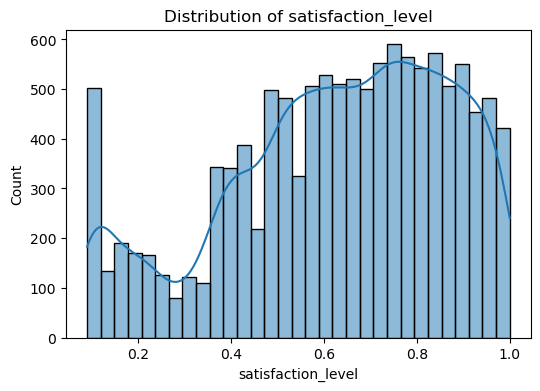

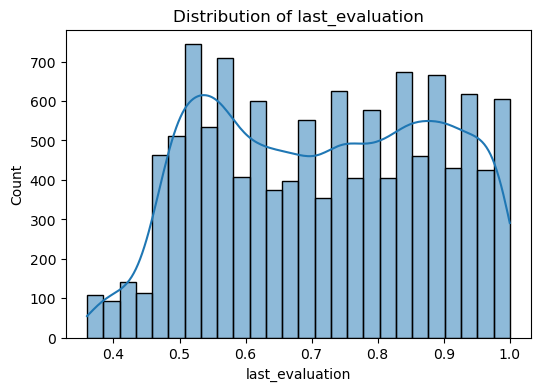

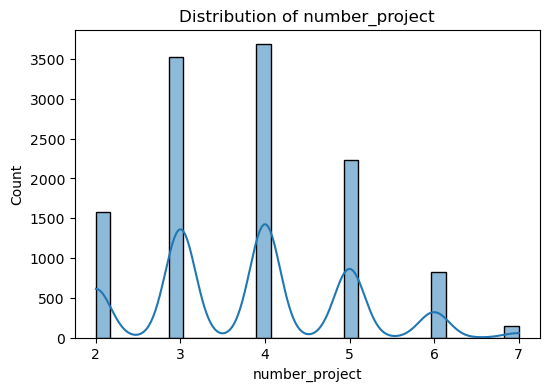

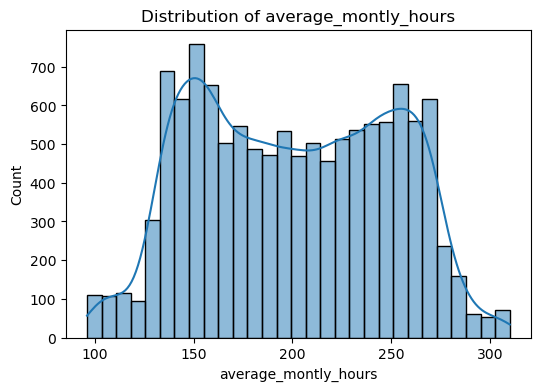

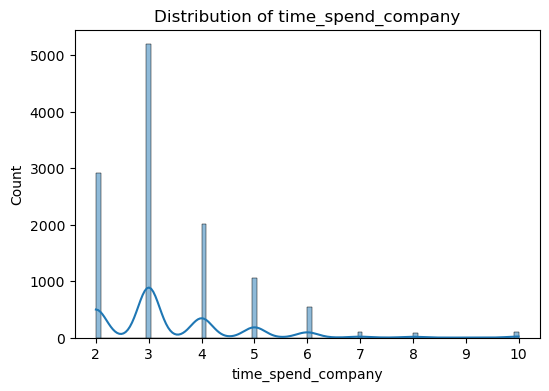

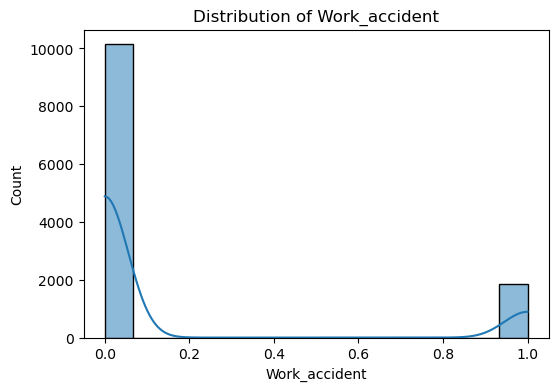

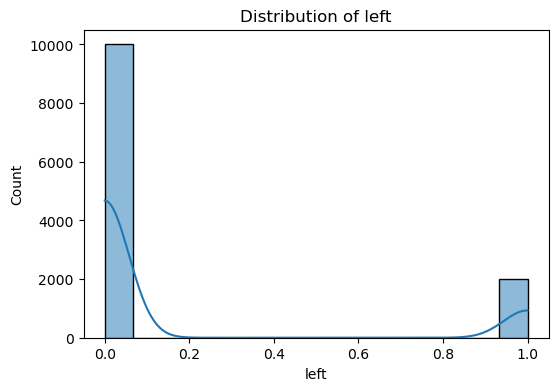

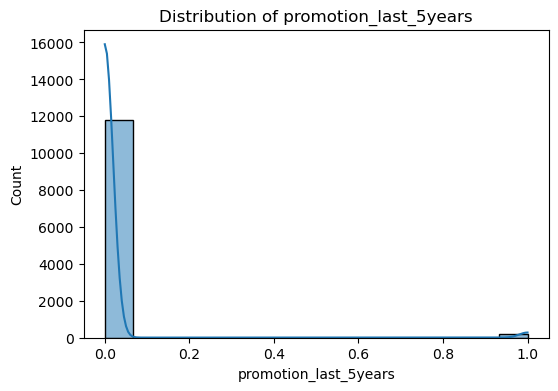

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")



Department value counts:
Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

salary value counts:
salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


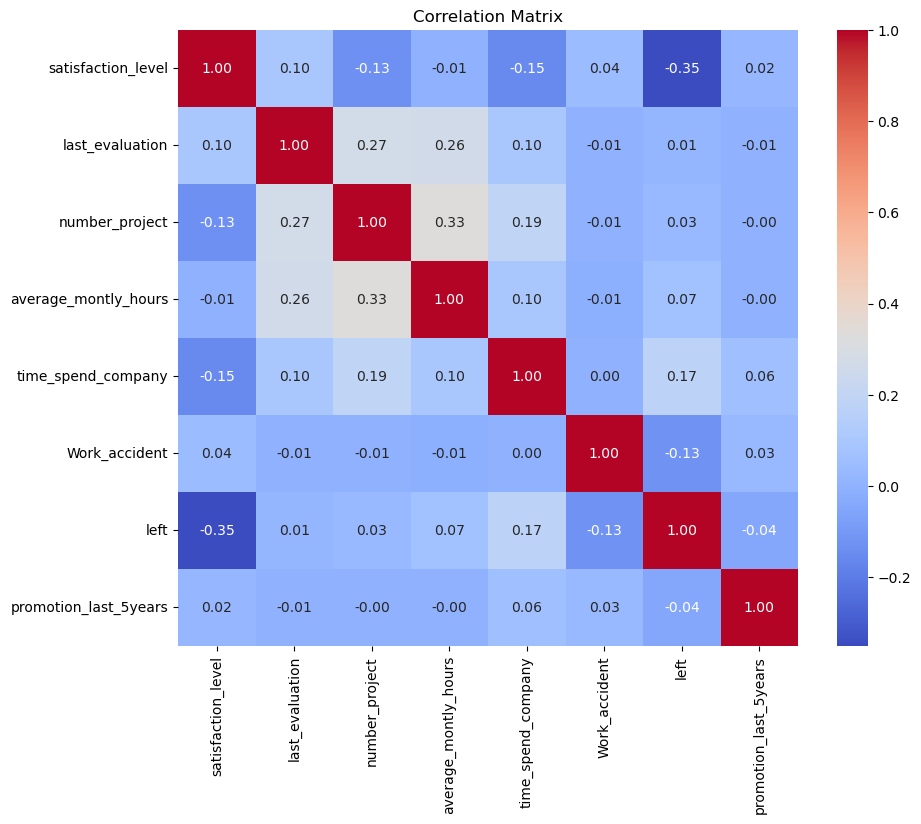

In [17]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

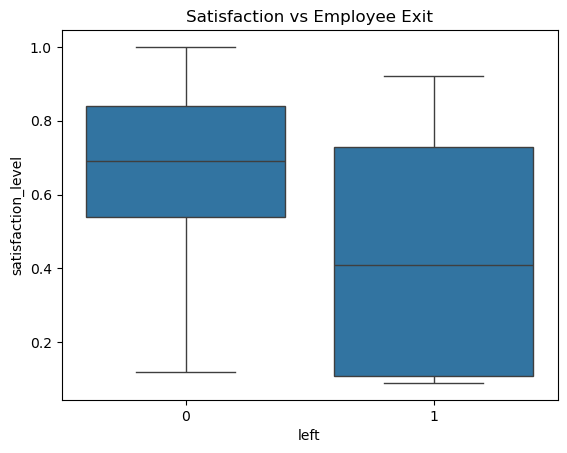

In [18]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction vs Employee Exit')
plt.show()

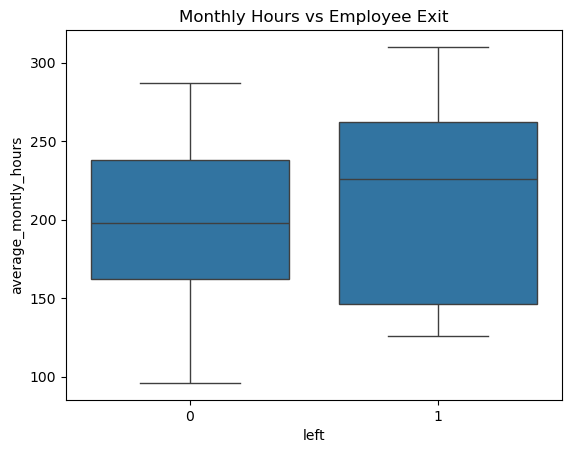

In [19]:
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Monthly Hours vs Employee Exit')
plt.show()


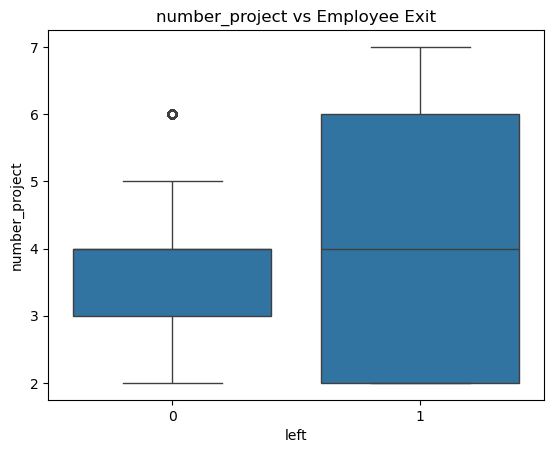

In [20]:
sns.boxplot(x='left', y='number_project', data=df)
plt.title('number_project vs Employee Exit')
plt.show()


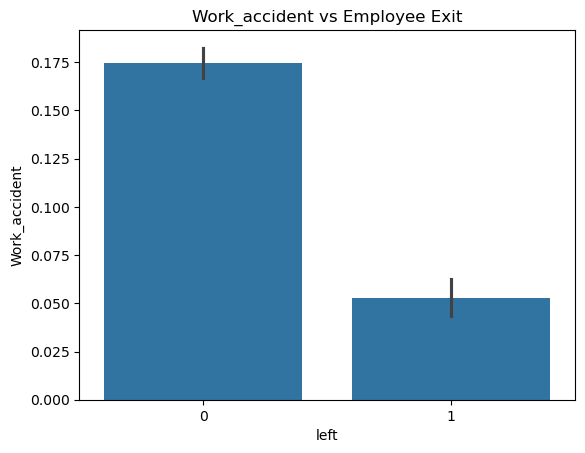

In [21]:

sns.barplot(x='left', y='Work_accident', data=df)
plt.title('Work_accident vs Employee Exit')
plt.show()

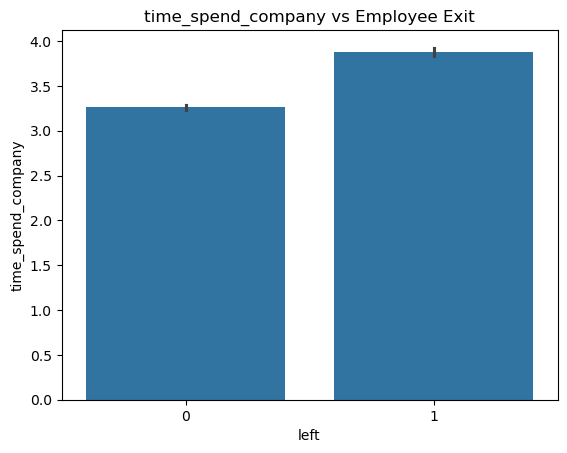

In [22]:
sns.barplot(x='left', y='time_spend_company', data=df)
plt.title('time_spend_company vs Employee Exit')
plt.show()

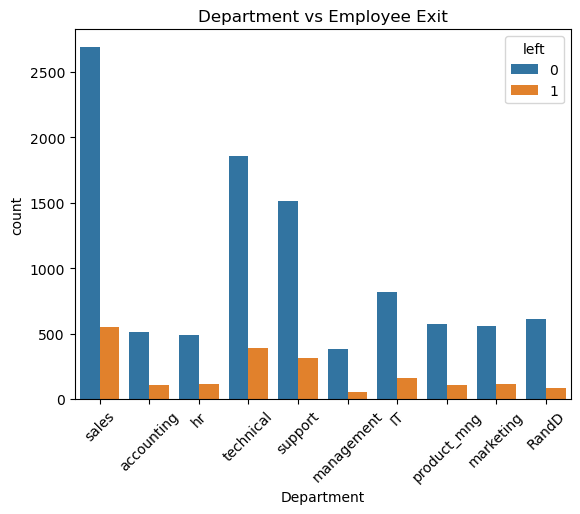

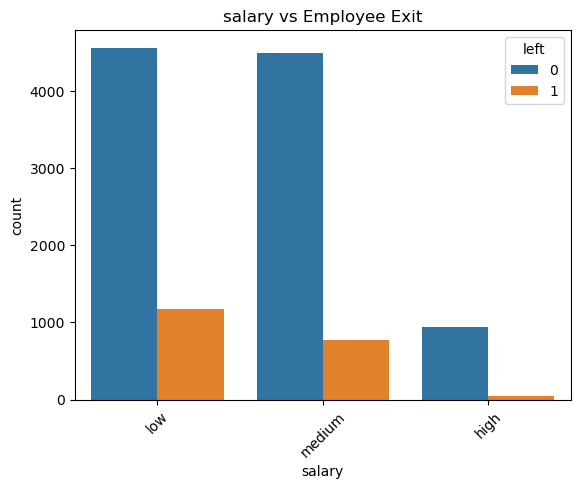

In [23]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if 'left' in df.columns:
        sns.countplot(x=col, hue='left', data=df)
        plt.title(f"{col} vs Employee Exit")
        plt.xticks(rotation=45)
        plt.show()

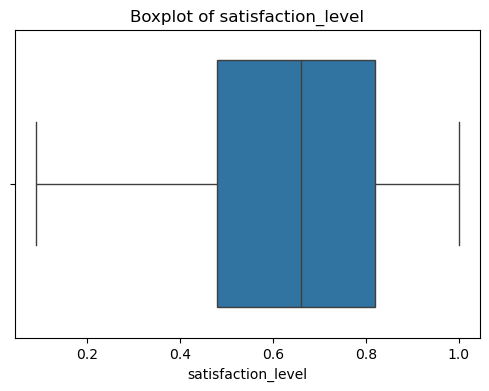

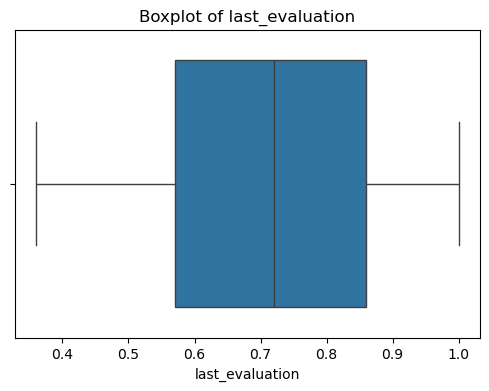

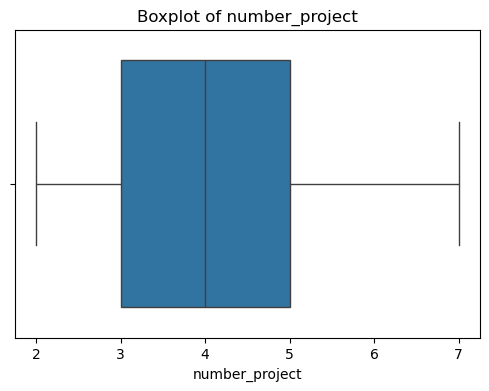

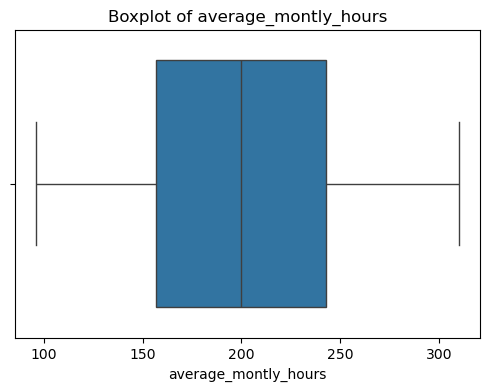

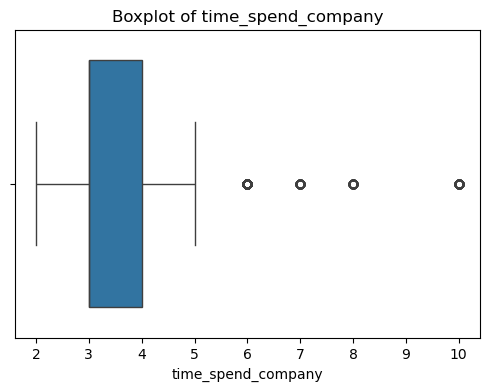

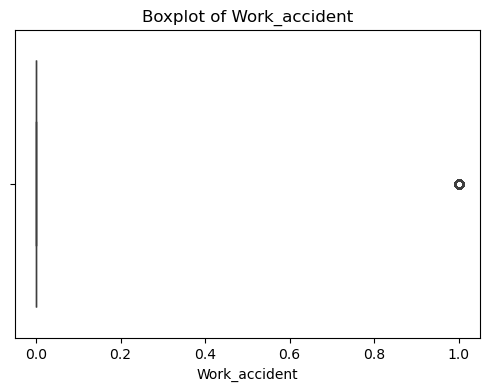

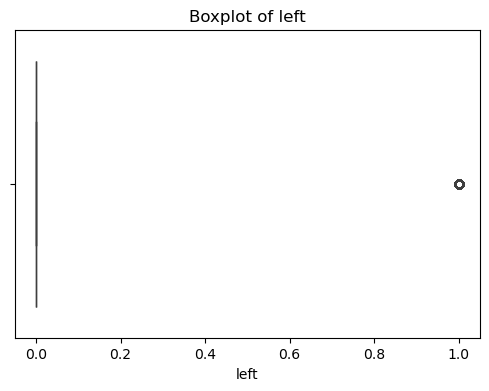

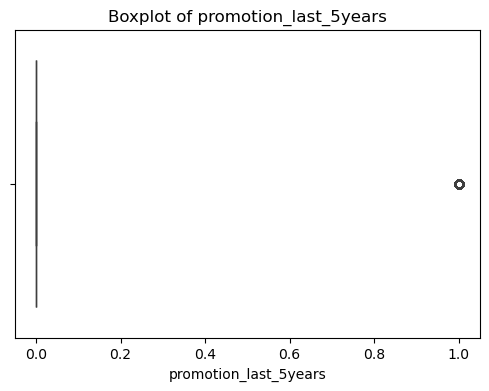

In [24]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
from scipy.stats import zscore

z_scores = df[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print(outliers)


satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company       188
Work_accident              0
left                       0
promotion_last_5years    203
dtype: int64


In [26]:
# Calculate Z-scores for numeric columns
z_scores = df[numeric_cols].apply(zscore)

# Filter out rows where any numeric column has a Z-score > 3 or < -3
df = df[(abs(z_scores) < 3).all(axis=1)]

# Confirm new shape
print(df.shape)


(11613, 10)


In [27]:
x=df.drop(columns=['left'],axis=1)
y=df['left']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9290, 9), (2323, 9), (9290,), (2323,))

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
categorical_features = ['Department', 'salary']


preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (StandardScaler(), numeric_features),
    remainder='passthrough'
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Classifier', XGBClassifier())
])

# Hyperparameter tuning 
param_grid = {
    'Classifier__n_estimators': [100, 200],
    'Classifier__max_depth': [3, 5, 7],
    'Classifier__learning_rate': [0.01, 0.1, 0.2],
    'Classifier__subsample': [0.8, 1],
    'Classifier__colsample_bytree': [0.8, 1],
    'Classifier__gamma': [0, 1],
    'Classifier__min_child_weight': [1, 5]
}
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Params: {'Classifier__colsample_bytree': 0.8, 'Classifier__gamma': 1, 'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 7, 'Classifier__min_child_weight': 1, 'Classifier__n_estimators': 100, 'Classifier__subsample': 1}
Best Score: 0.9818084072914329


In [30]:
best_params = grid.best_params_
pipeline_best_param = Pipeline([
    ('preprocessor', preprocessor),
    ('Classifier', XGBClassifier(
        n_estimators=best_params['Classifier__n_estimators'],
        max_depth=best_params['Classifier__max_depth'],
        learning_rate=best_params['Classifier__learning_rate'],
        subsample=best_params['Classifier__subsample'],
        colsample_bytree=best_params['Classifier__colsample_bytree'],
        gamma=best_params['Classifier__gamma'],
        min_child_weight=best_params['Classifier__min_child_weight'],
    ))
])

In [31]:
pipeline_best_param.fit(X_train,y_train)
pipeline_best_param.score(X_test,y_test)

0.9888075764098149

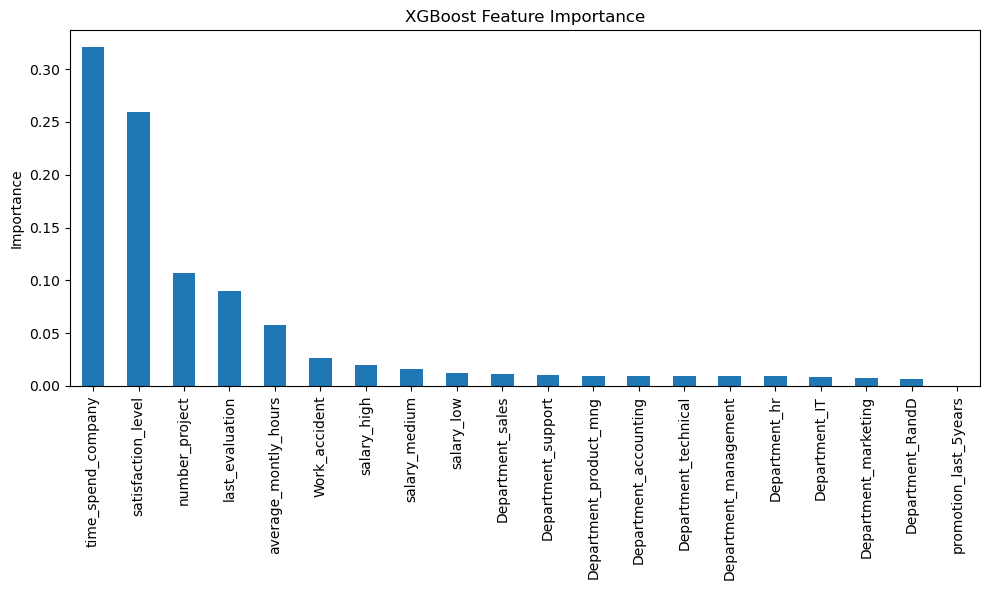

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


ohe = pipeline.named_steps['preprocessor'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = list(ohe_feature_names) + numeric_features

xgb_model = pipeline_best_param.named_steps['Classifier']

importances = xgb_model.feature_importances_

feat_importance = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importance.plot(kind='bar')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [75]:
import pickle

with open('modell_001.pkl', 'wb') as file:
    pickle.dump(pipeline_best_param, file)